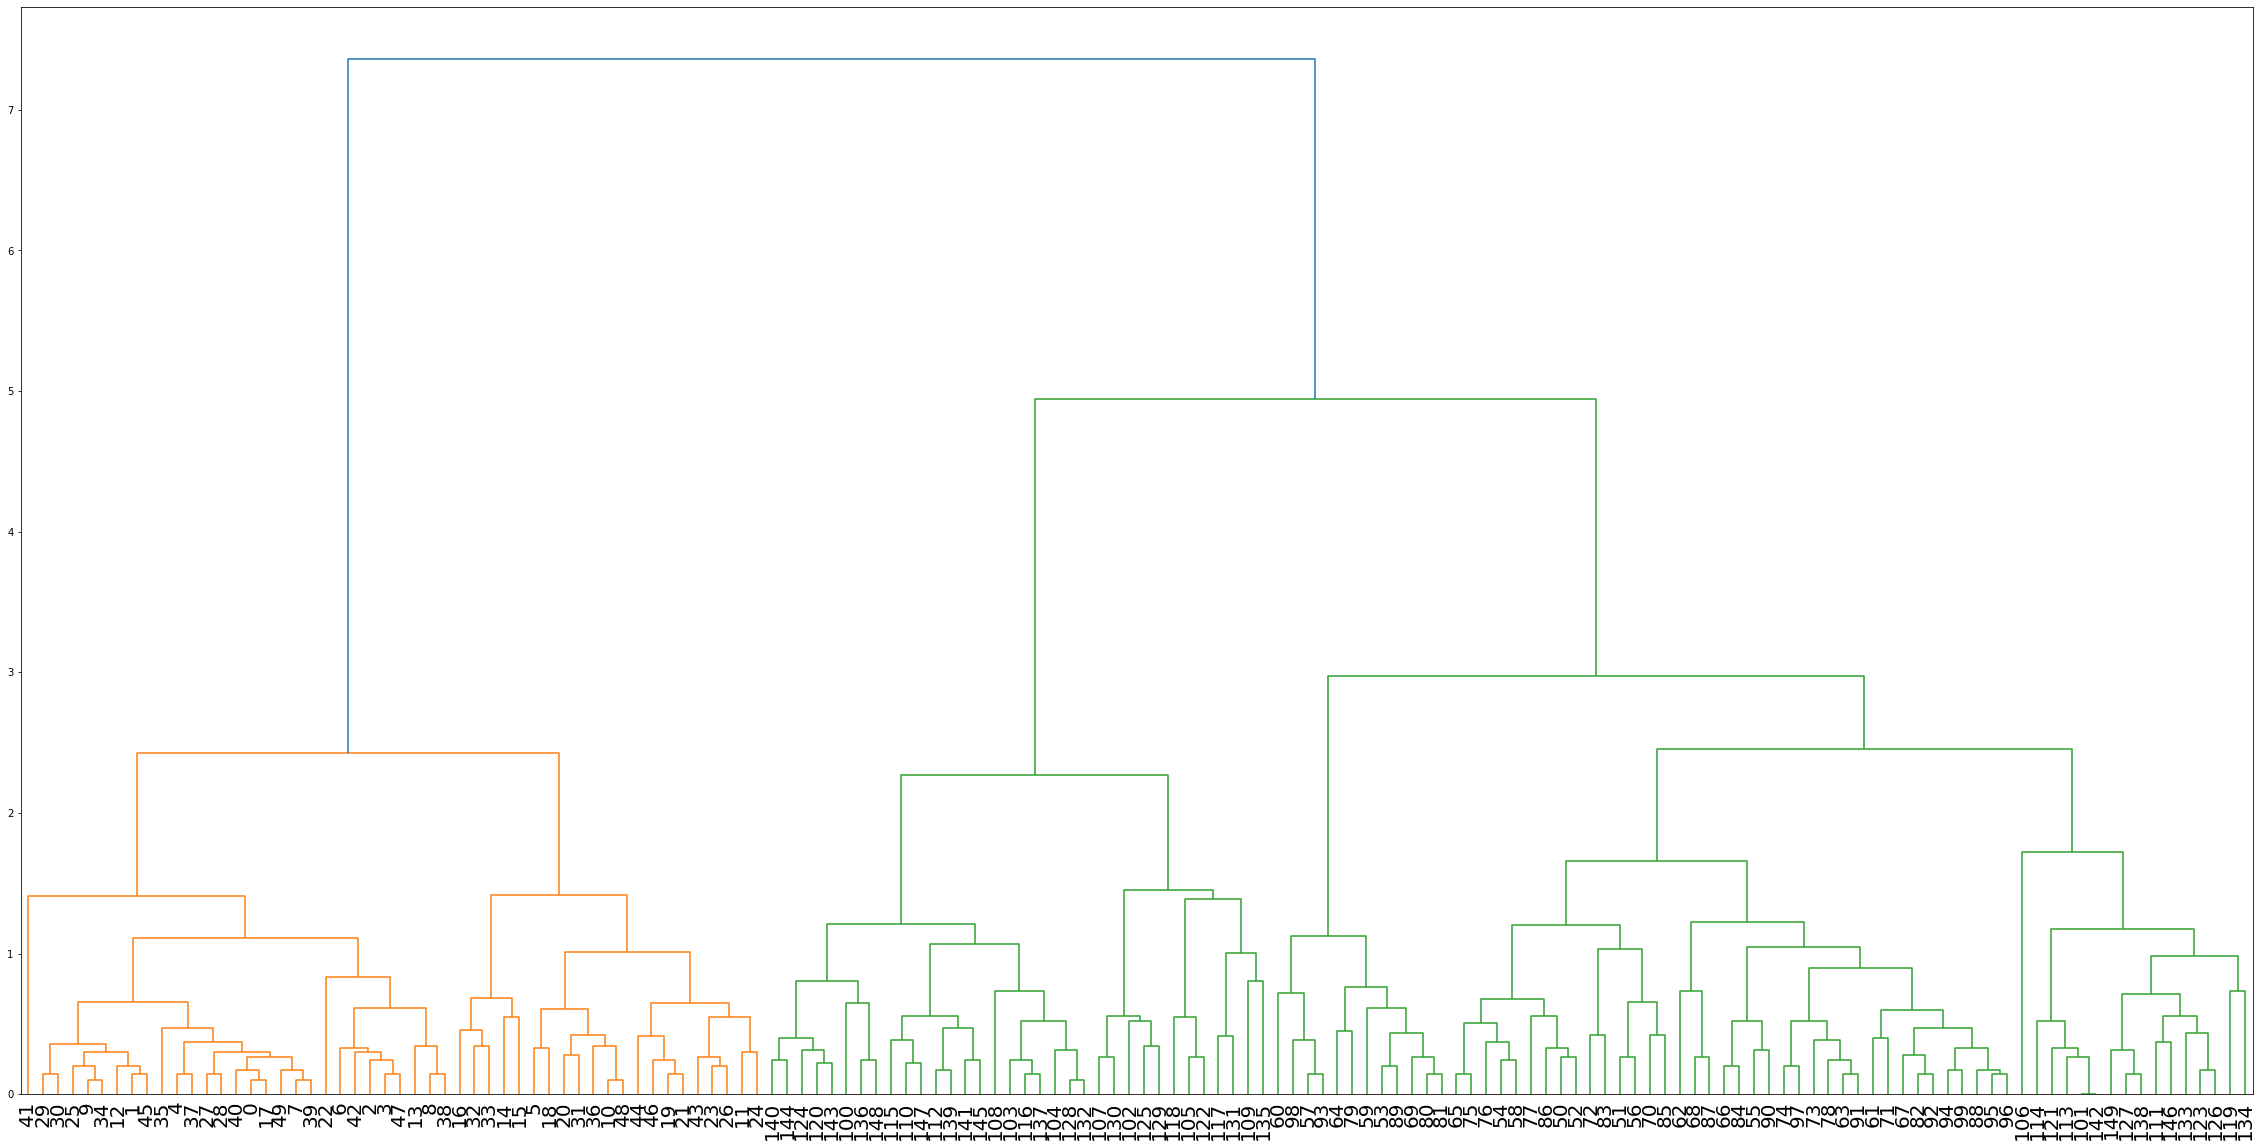

In [92]:
#임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram

# iris 데이터 로드
iris = sns.load_dataset('iris')

# species 문자 -> 벡터처리 
for i in range(len(iris)):
    if iris.loc[i,"species"] == 'setosa':
        iris.loc[i,"species"] = 0
    elif iris.loc[i,"species"] == 'versicolor':
        iris.loc[i,"species"] = 1
    elif iris.loc[i,"species"] == 'virginica':
        iris.loc[i,"species"] = 2

# complete linkage : 클러스터상 가장 먼거리 측정 방식
mergings = linkage(iris, method="complete")

#plot
plt.figure(figsize=(40,20))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

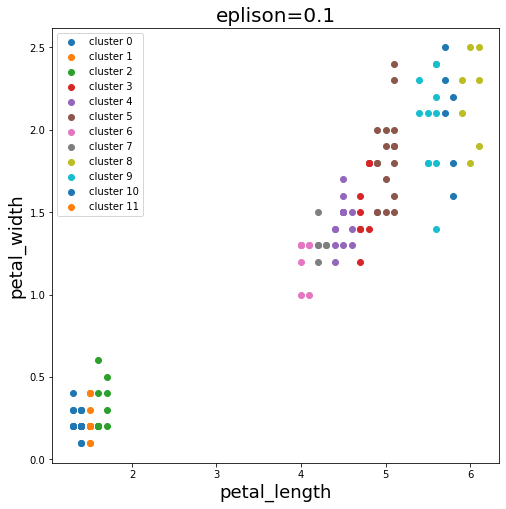

In [116]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.1, min_samples=5)
iris['cluster'] = model.fit_predict(iris[['petal_length']], iris[['petal_width']])
n = len(iris['cluster'].unique())

#plot 설정
plt.figure(figsize=(8,8))
for i in range(n):
    plt.scatter(iris.loc[iris['cluster'] == i, 'petal_length'], iris.loc[iris['cluster'] == i, 'petal_width'], 
                label = 'cluster '+str(i))
plt.title(f"eplison=0.1", fontsize=20)
plt.xlabel('petal_length', fontsize=18)
plt.ylabel('petal_width', fontsize=18)
plt.legend()
plt.show()